## Assignment : 14

<pre>
1. You can work with preprocessed_data.csv for the assignment. You can get the data from - <a href='https://drive.google.com/drive/u/0/folders/1CJnItndeSSJu7aragQoXWZS9-0apN6pp'>Data folder </a>
2. Load the data in your notebook.
3. After step 2 you have to train 3 types of models as discussed below. 
4. For all the model use <a href='https://scikit-learn.org/stable/modules/model_evaluation.html#roc-metrics'>'auc'</a> as a metric. check <a  href='https://stackoverflow.com/a/46844409'>this</a> and <a  href='https://www.kaggle.com/c/santander-customer-transaction-prediction/discussion/80807'>this</a> for using auc as a metric 
5. You are free to choose any number of layers/hiddden units but you have to use same type of architectures shown below. 
6. You can use any one of the optimizers and choice of Learning rate and momentum.
7. For all the model's use <a href='https://www.youtube.com/watch?v=2U6Jl7oqRkM'>TensorBoard</a> and plot the Metric value and Loss with epoch. While submitting, take a screenshot of plots and include those images in a separate pad and write your observations about them.
8. Make sure that you are using GPU to train the given models.
</pre>

In [ ]:
#you can use gdown modules to import dataset for the assignment
#for importing any file from drive to Colab you can write the syntax as !gdown --id file_id
#you can run the below cell to import the required preprocessed data.csv file and glove vector

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## <font color='red'> Model-1 </font>
Build and Train deep neural network as shown below

<img src='https://i.imgur.com/w395Yk9.png'>
ref: https://i.imgur.com/w395Yk9.png

- __Input_seq_total_text_data__ --- You have to give Total text data columns. After this use the Embedding layer to get word vectors. Use given predefined glove word vectors, don't train any word vectors. After this use LSTM and get the LSTM output and Flatten that output. 
- __Input_school_state__ --- Give 'school_state' column as input to embedding layer and Train the Keras Embedding layer. 
- __Project_grade_category__  --- Give 'project_grade_category' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_categories__ --- Give 'input_clean_categories' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_subcategories__ --- Give 'input_clean_subcategories' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_subcategories__ --- Give 'input_teacher_prefix' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_remaining_teacher_number_of_previously_posted_projects._resource_summary_contains_numerical_digits._price._quantity__ ---concatenate remaining columns and add a Dense layer after that. 



Below is an example of embedding layer for a categorical columns. In below code all are dummy values, we gave only for referance. 

In [ ]:
# https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work
'''input_layer = Input(shape=(n,))
embedding = Embedding(no_1, no_2, input_length=n)(input_layer)
flatten = Flatten()(embedding)'''

'input_layer = Input(shape=(n,))\nembedding = Embedding(no_1, no_2, input_length=n)(input_layer)\nflatten = Flatten()(embedding)'

### 1. Go through this blog, if you have any doubt on using predefined Embedding values in Embedding layer - https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
### 2. Please go through this link https://keras.io/getting-started/functional-api-guide/ and check the 'Multi-input and multi-output models' then you will get to know how to give multiple inputs. 

# <font color='red'> Model-1 </font>

In [2]:
# import all the libraries
#make sure that you import your libraries from tf.keras and not just keras
import tensorflow
from tensorflow.keras.layers import Input,Dense,LSTM,Embedding,Flatten,Concatenate,Dropout,BatchNormalization,Activation,Conv1D,LeakyReLU,PReLU,SpatialDropout1D

In [3]:
#read the csv file
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/preprocessed_data.csv')

In [4]:
df.columns

Index(['school_state', 'teacher_prefix', 'project_grade_category',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price'],
      dtype='object')

In [5]:
df.head()

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,1,literacy_language,literacy,having class 24 students comes diverse learner...,329.00
3,ga,mrs,grades_prek_2,2,1,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04
4,wa,mrs,grades_3_5,2,1,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74


In [6]:
y=df['project_is_approved']
x=df.drop('project_is_approved',axis=1)

In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [8]:
def tokenization(data):
  token=Tokenizer()
  token.fit_on_texts(data)
  vocab_size=len(token.word_index)+1
  tokenized=token.texts_to_sequences(data)
  return tokenized,vocab_size,token.word_index

In [9]:
def padding(tokenized,maxlen):
  padded=pad_sequences(tokenized,maxlen=maxlen,padding='post')
  return padded

In [10]:
essay_token,vocab_size_essay,word_index_essay=tokenization(x['essay'])
print(vocab_size_essay)
print(len(essay_token))

56382
109248


In [11]:
!unzip -q '/content/drive/MyDrive/glove vectors.zip'

In [12]:
!rm glove.6B.100d.txt
!rm glove.6B.200d.txt
!rm glove.6B.50d.txt

rm: cannot remove 'glove.6B.zip': No such file or directory


In [13]:
glove_vect=dict()
import numpy as np
f=open('/content/glove.6B.300d.txt',encoding='utf-8')
for i in f:
  values=i.split()
  word=values[0]
  vector=np.asarray(values[1:],dtype='float32')
  glove_vect[word]=vector
f.close()

In [14]:
emb_matrix_essay=np.zeros((vocab_size_essay,300))
for word,i in word_index_essay.items():
  vector=glove_vect.get(word)
  if vector is not None:
    emb_matrix_essay[i]=vector

In [15]:
emb_matrix_essay.shape

(56382, 300)

In [16]:
np.save('/content/drive/MyDrive/Kaggle/emb_matrix_essay.npy',emb_matrix_essay)

In [17]:
import numpy as np
emb_matrix_essay=np.load('/content/drive/MyDrive/Kaggle/emb_matrix_essay.npy',allow_pickle=True)

In [18]:
emb_matrix_essay.shape

(56382, 300)

In [19]:
cc_token,vocab_size_cc,word_index_cc=tokenization(x['clean_categories'])
print(vocab_size_cc)
print(len(cc_token))
print(word_index_cc)

16
109248
{'literacy': 1, 'language': 2, 'math': 3, 'science': 4, 'health': 5, 'sports': 6, 'specialneeds': 7, 'appliedlearning': 8, 'music': 9, 'arts': 10, 'history': 11, 'civics': 12, 'warmth': 13, 'care': 14, 'hunger': 15}


In [20]:
cs_token,vocab_size_cs,word_index_cs=tokenization(x['clean_subcategories'])
print(vocab_size_cs)
print(len(cs_token))
print(word_index_cs)

38
109248
{'literacy': 1, 'mathematics': 2, 'literature': 3, 'writing': 4, 'health': 5, 'specialneeds': 6, 'appliedsciences': 7, 'wellness': 8, 'visualarts': 9, 'environmentalscience': 10, 'gym': 11, 'fitness': 12, 'esl': 13, 'earlydevelopment': 14, 'lifescience': 15, 'history': 16, 'geography': 17, 'music': 18, 'college': 19, 'careerprep': 20, 'other': 21, 'teamsports': 22, 'charactereducation': 23, 'performingarts': 24, 'socialsciences': 25, 'warmth': 26, 'care': 27, 'hunger': 28, 'nutritioneducation': 29, 'foreignlanguages': 30, 'civics': 31, 'government': 32, 'extracurricular': 33, 'parentinvolvement': 34, 'financialliteracy': 35, 'communityservice': 36, 'economics': 37}


In [21]:
pgc_token,vocab_size_pgc,word_index_pgc=tokenization(x['project_grade_category'])
print(len(pgc_token))
print(vocab_size_pgc)
print(word_index_pgc)

109248
10
{'grades': 1, 'prek': 2, '2': 3, '3': 4, '5': 5, '6': 6, '8': 7, '9': 8, '12': 9}


In [22]:
ss_token,vocab_size_ss,word_index_ss=tokenization(x['school_state'])
print(len(ss_token))
print(vocab_size_ss)
print(word_index_ss)

109248
52
{'ca': 1, 'tx': 2, 'ny': 3, 'fl': 4, 'nc': 5, 'il': 6, 'ga': 7, 'sc': 8, 'mi': 9, 'pa': 10, 'in': 11, 'mo': 12, 'oh': 13, 'la': 14, 'ma': 15, 'wa': 16, 'ok': 17, 'nj': 18, 'az': 19, 'va': 20, 'wi': 21, 'al': 22, 'ut': 23, 'tn': 24, 'ct': 25, 'md': 26, 'nv': 27, 'ms': 28, 'ky': 29, 'or': 30, 'mn': 31, 'co': 32, 'ar': 33, 'id': 34, 'ia': 35, 'ks': 36, 'nm': 37, 'dc': 38, 'hi': 39, 'me': 40, 'wv': 41, 'nh': 42, 'ak': 43, 'de': 44, 'ne': 45, 'sd': 46, 'ri': 47, 'mt': 48, 'nd': 49, 'wy': 50, 'vt': 51}


In [23]:
tp_token,vocab_size_tp,word_index_tp=tokenization(x['teacher_prefix'])
print(len(tp_token))
print(vocab_size_tp)
print(word_index_tp)

109248
6
{'mrs': 1, 'ms': 2, 'mr': 3, 'teacher': 4, 'dr': 5}


In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler=StandardScaler()
scaled_price=scaler.fit_transform(x['price'].values.reshape(-1,1))
scaled_tnppp=scaler.fit_transform(x['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
print(scaled_price.shape)
print(scaled_tnppp.shape)

(109248, 1)
(109248, 1)


In [26]:
from tensorflow.keras.utils import to_categorical

In [27]:
n_classes=len(y.unique())
print(n_classes)
y=to_categorical(y,n_classes)
print(y.shape)

2
(109248, 2)


In [28]:
final_df=pd.DataFrame()

In [29]:
final_df['essay_token']=essay_token
final_df['cc_token']=cc_token
final_df['cs_token']=cs_token
final_df['pgc_token']=pgc_token
final_df['ss_token']=ss_token
final_df['tp_token']=tp_token
final_df['scaled_price']=scaled_price
final_df['scaled_tnppp']=scaled_tnppp

In [30]:
final_df.head()

,essay_token,cc_token,cs_token,pgc_token,ss_token,tp_token,scaled_price,scaled_tnppp
0,"[2, 996, 297, 18, 2585, 3677, 265, 733, 6, 66,...","[3, 4]","[7, 5, 15]","[1, 2, 3]",[1],[1],1.161728,1.506527
1,"[566, 624, 1207, 158, 319, 675, 358, 39, 6, 67...",[7],[6],"[1, 4, 5]",[23],[2],-0.231538,-0.257521
2,"[179, 23, 1328, 1, 519, 105, 57, 220, 1, 10, 5...","[1, 2]",[1],"[1, 2, 3]",[1],[1],0.084030,-0.041515
3,"[2, 841, 47, 3282, 398, 1, 408, 10, 14, 450, 1...",[8],[14],"[1, 2, 3]",[7],[1],0.497748,-0.329523
4,"[4, 1, 1788, 292, 1027, 819, 303, 38, 31, 598,...","[1, 2]",[1],"[1, 4, 5]",[16],[1],-0.762945,-0.329523


In [31]:
# perform stratified train test split on the dataset
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te=train_test_split(final_df,y,test_size=0.25,stratify=y,random_state=1) 

In [32]:
print(x_tr.shape)
print(x_te.shape)
print(y_tr.shape)
print(y_te.shape)

(81936, 8)
(27312, 8)
(81936, 2)
(27312, 2)


In [33]:
x_tr.head()

,essay_token,cc_token,cs_token,pgc_token,ss_token,tp_token,scaled_price,scaled_tnppp
10092,"[54, 803, 37, 1323, 539, 3269, 178, 6109, 2764...","[3, 4, 9, 10]","[2, 9]","[1, 2, 3]",[7],[3],-0.403104,-0.401525
35210,"[4, 1, 190, 480, 6069, 1085, 848, 929, 14, 420...","[9, 10]",[18],"[1, 4, 5]",[24],[3],-0.675189,-0.005514
95582,"[4, 6, 176, 2067, 518, 691, 148, 316, 517, 30,...","[8, 7]","[14, 6]","[1, 2, 3]",[36],[1],-0.109605,-0.365524
102373,"[3558, 9469, 6835, 16231, 4134, 4075, 808, 188...","[8, 1, 2]","[33, 3, 4]","[1, 6, 7]",[5],[1],-0.436030,-0.365524
12472,"[963, 1006, 1, 605, 6, 103, 1915, 821, 9, 201,...","[1, 2]",[1],"[1, 4, 5]",[13],[1],-0.691515,-0.365524


In [34]:
essay_maxlen=max([len(i) for i in final_df['essay_token']])
pad_essay_tr=padding(x_tr['essay_token'],essay_maxlen)
pad_essay_te=padding(x_te['essay_token'],essay_maxlen)
print(pad_essay_tr.shape)
print(pad_essay_te.shape)

(81936, 339)
(27312, 339)


In [35]:
cc_maxlen=max([len(i) for i in final_df['cc_token']])
pad_cc_tr=padding(x_tr['cc_token'],cc_maxlen)
pad_cc_te=padding(x_te['cc_token'],cc_maxlen)
print(pad_cc_tr.shape)
print(pad_cc_te.shape)

(81936, 5)
(27312, 5)


In [36]:
cs_maxlen=max([len(i) for i in final_df['cs_token']])
pad_cs_tr=padding(x_tr['cs_token'],cs_maxlen)
pad_cs_te=padding(x_te['cs_token'],cs_maxlen)
print(pad_cs_tr.shape)
print(pad_cs_te.shape)

(81936, 5)
(27312, 5)


In [37]:
pgc_maxlen=max([len(i) for i in final_df['pgc_token']])
pad_pgc_tr=padding(x_tr['pgc_token'],pgc_maxlen)
pad_pgc_te=padding(x_te['pgc_token'],pgc_maxlen)
print(pad_pgc_tr.shape)
print(pad_pgc_te.shape)

(81936, 3)
(27312, 3)


In [38]:
ss_maxlen=max([len(i) for i in final_df['ss_token']])
pad_ss_tr=padding(x_tr['ss_token'],ss_maxlen)
pad_ss_te=padding(x_te['ss_token'],ss_maxlen)
print(pad_ss_tr.shape)
print(pad_ss_te.shape)

(81936, 1)
(27312, 1)


In [39]:
tp_maxlen=max([len(i) for i in final_df['tp_token']])
pad_tp_tr=padding(x_tr['tp_token'],tp_maxlen)
pad_tp_te=padding(x_te['tp_token'],tp_maxlen)
print(pad_tp_tr.shape)
print(pad_tp_te.shape)

(81936, 1)
(27312, 1)


In [40]:
num_features_tr=np.hstack((x_tr['scaled_price'].values.reshape(-1,1),x_tr['scaled_tnppp'].values.reshape(-1,1)))
num_features_te=np.hstack((x_te['scaled_price'].values.reshape(-1,1),x_te['scaled_tnppp'].values.reshape(-1,1)))
print(num_features_tr.shape)
print(num_features_te.shape)

(81936, 2)
(27312, 2)


## 1.1 Text Vectorization

In [ ]:
#since the data is already preprocessed, we can directly move to vectorization part
#first we will vectorize the text data
#for vectorization of text data in deep learning we use tokenizer, you can go through below references
# https://www.kdnuggets.com/2020/03/tensorflow-keras-tokenization-text-data-prep.html
#https://stackoverflow.com/questions/51956000/what-does-keras-tokenizer-method-exactly-do
# after text vectorization you should get train_padded_docs and test_padded_docs

In [ ]:
#after getting the padded_docs you have to use predefined glove vectors to get 300 dim representation for each word
# we will be storing this data in form of an embedding matrix and will use it while defining our model
# Please go through following blog's 'Example of Using Pre-Trained GloVe Embedding' section to understand how to create embedding matrix
# https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/



## 1.2 Categorical feature Vectorization

In [ ]:
# for model 1 and model 2, we have to assign a unique number to each feature in a particular categorical column.
# you can either use tokenizer,label encoder or ordinal encoder to perform the task
# label encoder gives an error for 'unseen values' (values present in test but not in train)
# handle unseen values with label encoder - https://stackoverflow.com/a/56876351
# ordinal encoder also gives error with unseen values but you can use modify handle_unknown parameter
# documentation of ordianl encoder https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html
# after categorical feature vectorization you will have column_train_data and column_test_data.


## 1.3 Numerical feature Vectorization

In [ ]:
# you have to standardise the numerical columns
# stack both the numerical features
#after numerical feature vectorization you will have numerical_data_train and numerical_data_test

## 1.4 Defining the model

<img src='https://i.imgur.com/w395Yk9.png'>

In [ ]:
# as of now we have vectorized all our features now we will define our model.
# as it is clear from above image that the given model has multiple input layers and hence we have to use functional API
# Please go through - https://keras.io/guides/functional_api/
# it is a good programming practise to define your complete model i.e all inputs , intermediate and output layers at one place.
# while defining your model make sure that you use variable names while defining any length,dimension or size.
#for ex.- you should write the code as 'input_text = Input(shape=(pad_length,))' and not as 'input_text = Input(shape=(300,))'
# the embedding layer for text data should be non trainable
# the embedding layer for categorical data should be trainable
# https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work
# https://towardsdatascience.com/deep-embeddings-for-categorical-variables-cat2vec-b05c8ab63ac0
#print model.summary() after you have defined the model
#plot the model using utils.plot_model module and make sure that it is similar to the above image

In [41]:
#input essay feature
input1 = Input(shape=essay_maxlen)
x1 = Embedding(input_dim=vocab_size_essay,output_dim=300,input_length=essay_maxlen,embeddings_initializer=tensorflow.keras.initializers.constant(emb_matrix_essay),trainable=False)(input1)
x1 = LSTM(128,return_sequences=True)(x1)
x1 = Flatten()(x1)

#input school state feature
input2=Input(shape=ss_maxlen)
x2=Embedding(input_dim=vocab_size_ss,output_dim=vocab_size_ss//2,input_length=ss_maxlen)(input2)
x2=Flatten()(x2)

#input project grade category feature
input3=Input(shape=pgc_maxlen)
x3=Embedding(input_dim=vocab_size_pgc,output_dim=vocab_size_pgc//2,input_length=pgc_maxlen)(input3)
x3=Flatten()(x3)

#input clean categories feature
input4=Input(shape=cc_maxlen)
x4=Embedding(input_dim=vocab_size_cc,output_dim=vocab_size_cc//2,input_length=cc_maxlen)(input4)
x4=Flatten()(x4)

#input clean subcategories feature 
input5=Input(shape=cs_maxlen)
x5=Embedding(input_dim=vocab_size_cs,output_dim=vocab_size_cs//2,input_length=cs_maxlen)(input5)
x5=Flatten()(x5)

#input teacher prefix feature
input6=Input(shape=tp_maxlen)
x6=Embedding(input_dim=vocab_size_tp,output_dim=vocab_size_tp//2,input_length=tp_maxlen)(input6)
x6=Flatten()(x6)

#input numerical features
input7 = Input(shape=2)
x7 = Dense(16,kernel_initializer=tensorflow.keras.initializers.he_normal(),kernel_regularizer=tensorflow.keras.regularizers.l2(0.0001))(input7)
x7 = LeakyReLU()(x7)

#concatinating inputs
concat=Concatenate()([x1,x2,x3,x4,x5,x6,x7])
z = Dense(128,kernel_initializer=tensorflow.keras.initializers.he_normal(),kernel_regularizer=tensorflow.keras.regularizers.l2(0.0001))(concat)
z = Dropout(0.5)(z)
z = LeakyReLU()(z)
z = Dense(64,kernel_initializer=tensorflow.keras.initializers.he_normal(),kernel_regularizer=tensorflow.keras.regularizers.l2(0.0001))(z)
z = Dropout(0.5)(z)
z = BatchNormalization()(z)
z = LeakyReLU()(z)
z = Dense(32,kernel_initializer=tensorflow.keras.initializers.he_normal(),kernel_regularizer=tensorflow.keras.regularizers.l2(0.0001))(z)
z = LeakyReLU()(z)
output = Dense(2, activation = 'softmax')(z)
model1=tensorflow.keras.Model([input1,input2,input3,input4,input5,input6,input7],output)
model1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 339)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 339, 300)     16914600    ['input_1[0][0]']                
                                                                                                  
 input_2 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 3)]          0           []                               
                                                                                              

## 1.5 Compiling and fititng your model

In [ ]:
#define custom auc as metric , do not use tf.keras.metrics
# https://stackoverflow.com/a/46844409 - custom AUC reference 1
# https://www.kaggle.com/c/santander-customer-transaction-prediction/discussion/80807  - custom AUC reference 2
# compile and fit your model

In [42]:
from sklearn.metrics import roc_auc_score
from keras.callbacks import Callback
class RocCallback(Callback):
    def __init__(self,training_data,validation_data):
        self.x = training_data[0]
        self.y = training_data[1]
        self.x_val = validation_data[0]
        self.y_val = validation_data[1]


    def on_train_begin(self, logs={}):
        self.history={'loss': [],'accuracy': [],'val_loss': [],'val_accuracy': [],'val_AUC': []}
        return

    def on_epoch_end(self, epoch, logs={}):
        y_pred_train = self.model.predict(self.x)
        roc_train = roc_auc_score(self.y, y_pred_train)
        y_pred_val = self.model.predict(self.x_val)
        roc_val = roc_auc_score(self.y_val, y_pred_val)
        self.history['val_AUC'].append(roc_val)
        print('\rroc-auc_train: %s - roc-auc_val: %s' % (str(round(roc_train,4)),str(round(roc_val,4))),end=100*' '+'\n')
        return

roc = RocCallback(training_data=([pad_essay_tr,pad_ss_tr,pad_pgc_tr,pad_cc_tr,pad_cs_tr,pad_tp_tr,num_features_tr],y_tr),
                  validation_data=([pad_essay_te,pad_ss_te,pad_pgc_te,pad_cc_te,pad_cs_te,pad_tp_te,num_features_te],y_te))
tensorboard=tensorflow.keras.callbacks.TensorBoard(log_dir='logs/model1',write_images=True) 
earlystopping = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, verbose=1)  
filepath=filepath="model_save/weights-{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpoint = tensorflow.keras.callbacks.ModelCheckpoint(filepath, monitor='val_AUC', verbose=1, save_best_only=True, mode='max')

In [43]:
from tensorflow.keras.utils import plot_model

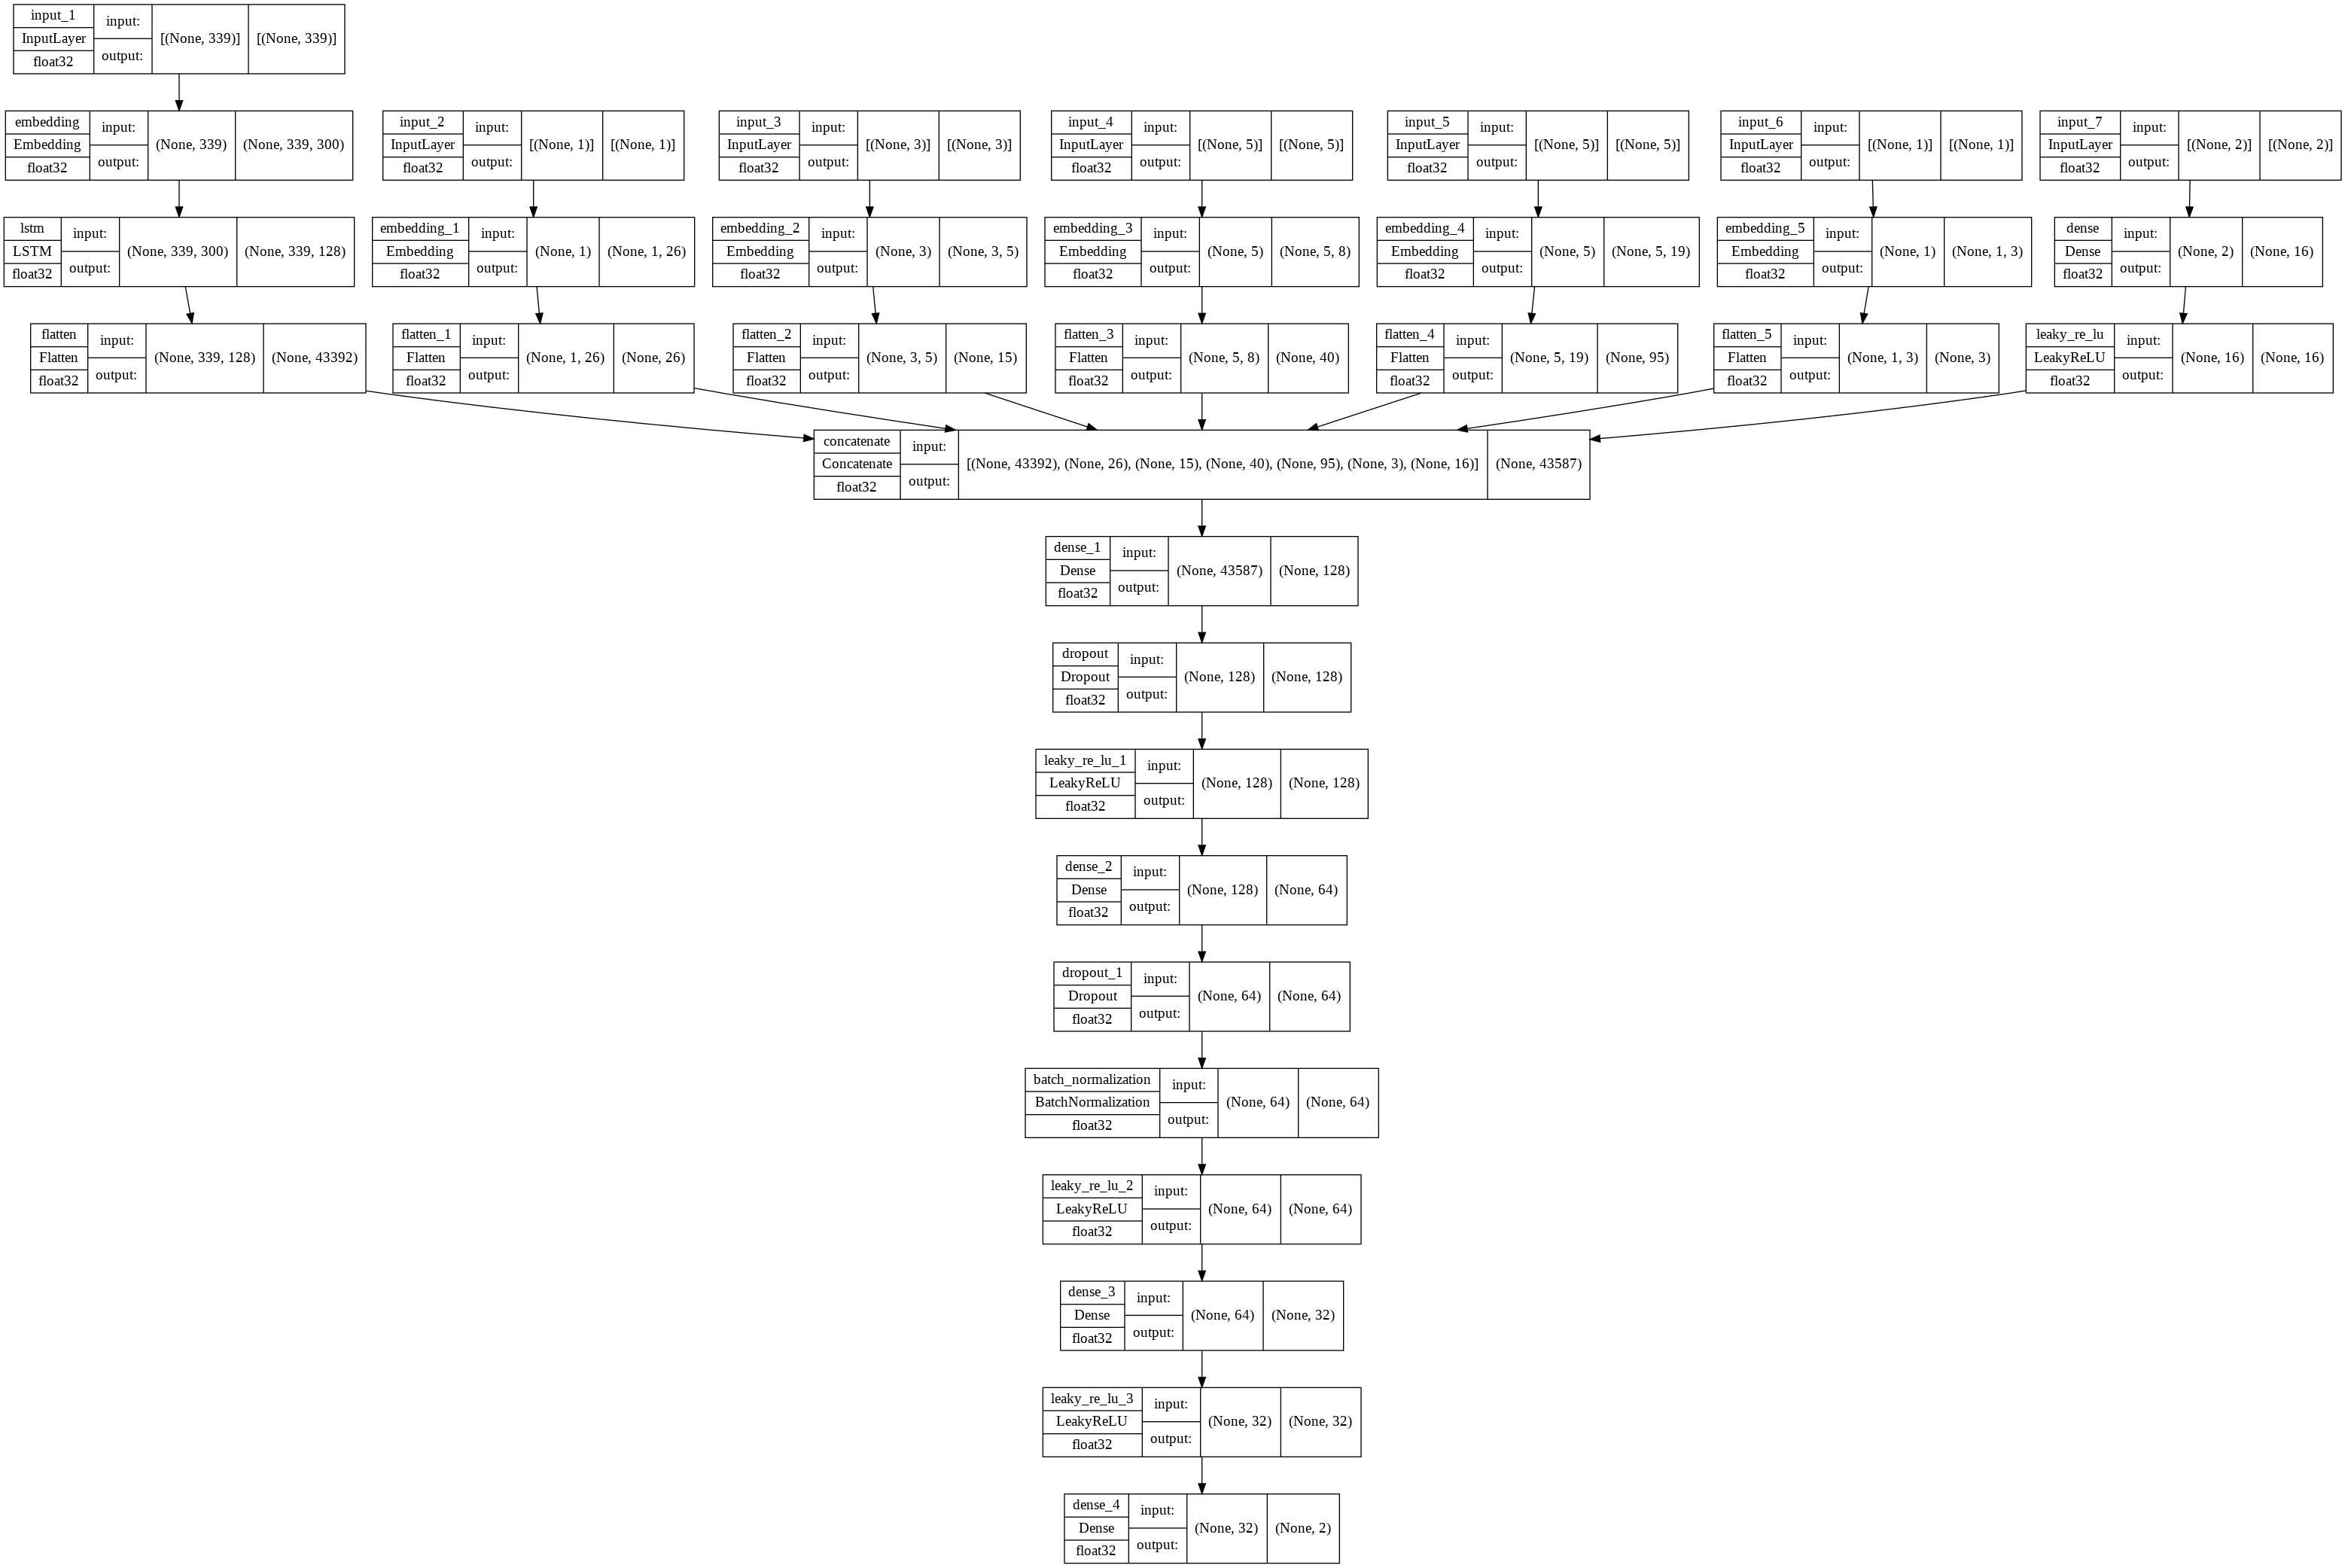

In [44]:
plot_model(model1,to_file='/content/drive/MyDrive/Kaggle/LSTM1.png',show_shapes=True, show_dtype=True, show_layer_names=True)

In [45]:
model1.compile(loss='categorical_crossentropy', optimizer=tensorflow.keras.optimizers.Adam(0.0006),metrics=['accuracy'])

In [46]:
model1.fit([pad_essay_tr,pad_ss_tr,pad_pgc_tr,pad_cc_tr,pad_cs_tr,pad_tp_tr,num_features_tr],y_tr,
           epochs=10,steps_per_epoch=pad_essay_tr.shape[0]//256,
           batch_size=256,callbacks=[tensorboard,checkpoint,earlystopping,roc],
           validation_data=([pad_essay_te,pad_ss_te,pad_pgc_te,pad_cc_te,pad_cs_te,pad_tp_te,num_features_te],y_te))

Epoch 1/10
320/320 [==============================] - ETA: 0s - loss: 0.4748 - accuracy: 0.8391WARNING:tensorflow:Can save best model only with val_AUC available, skipping.
roc-auc_train: 0.7342 - roc-auc_val: 0.723                                                                                                    
320/320 [==============================] - 56s 150ms/step - loss: 0.4748 - accuracy: 0.8391 - val_loss: 0.4341 - val_accuracy: 0.8529
Epoch 2/10
320/320 [==============================] - ETA: 0s - loss: 0.4245 - accuracy: 0.8505WARNING:tensorflow:Can save best model only with val_AUC available, skipping.
roc-auc_train: 0.7628 - roc-auc_val: 0.732                                                                                                    
320/320 [==============================] - 51s 160ms/step - loss: 0.4245 - accuracy: 0.8505 - val_loss: 0.4411 - val_accuracy: 0.8523
Epoch 3/10
320/320 [==============================] - ETA: 0s - loss: 0.4122 - accuracy: 0.8528WARNI

In [47]:
model1.save_weights('/content/drive/MyDrive/Kaggle/LSTMmodel1.h5')

# <font color='red'> Model-2 </font>

Use the same model as above but for 'input_seq_total_text_data' give only some words in the sentance not all the words. Filter the words as below. 

<pre>
1. Fit TF-IDF vectorizer on the Train data <br>
2. Get the idf value for each word we have in the train data. Please go through <a  href='https://stackoverflow.com/questions/23792781/tf-idf-feature-weights-using-sklearn-feature-extraction-text-tfidfvectorizer'>this</a><br>

3. Do some analysis on the Idf values and based on those values choose the low and high threshold value. Because very 
frequent words and very very rare words don't give much information.
Hint - A preferable IDF range is 2-11 for model 2. <br>
4.Remove the low idf value and high idf value words from the train and test data. You can go through each of the
sentence of train and test data and include only those features(words) which are present in the defined IDF range.
5. Perform tokenization on the modified text data same as you have done for previous model.
6. Create embedding matrix for model 2 and then use the rest of the features similar to previous model.
7. Define the model, compile and fit the model.
</pre>

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [49]:
tfidf=TfidfVectorizer()
tfidf.fit(x['essay'])

TfidfVectorizer()

In [50]:
len(tfidf.idf_)

56345

In [51]:
import matplotlib.pyplot as plt

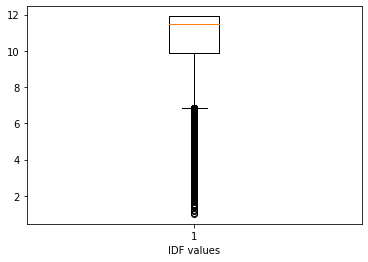

In [52]:
plt.boxplot(tfidf.idf_)
plt.xlabel('IDF values')
plt.show()

In [53]:
print(np.percentile(tfidf.idf_,25),np.percentile(tfidf.idf_,75))

9.893334758495657 11.908237779037922


In [54]:
features=list(zip(tfidf.get_feature_names(),tfidf.idf_))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [55]:
needed_features=[]
lower=np.percentile(tfidf.idf_,25)
upper=np.percentile(tfidf.idf_,75)
for word,idf in features:
  if idf<=upper and idf>=lower:
    needed_features.append(word)    

In [56]:
len(needed_features)

42262

In [57]:
needed_features

['000s',
 '001',
 '002',
 '003',
 '005nannan',
 '00am',
 '00p',
 '01',
 '010',
 '01075rm',
 '01g',
 '01ip',
 '02',
 '021',
 '022x10',
 '024',
 '025',
 '02810010',
 '03',
 '030',
 '0315',
 '034',
 '04',
 '041',
 '04112016',
 '047',
 '05',
 '050',
 '059',
 '05a',
 '05pm',
 '06',
 '060',
 '07',
 '072',
 '074',
 '076',
 '077',
 '08',
 '084',
 '09',
 '0mp',
 '0my',
 '0nly',
 '0thanks',
 '0the',
 '0ver',
 '1000blackgirlbooks',
 '1000s',
 '10027',
 '1009',
 '100cm',
 '100ft',
 '100m',
 '100s',
 '1017',
 '1020',
 '1022',
 '1043',
 '1057',
 '106',
 '1065',
 '1070',
 '1077',
 '1080p',
 '1082',
 '1084',
 '109',
 '1099',
 '10am',
 '10cm',
 '10k',
 '10min',
 '10pk',
 '10pm',
 '10s',
 '10the',
 '10u',
 '10x',
 '10x10',
 '10yrs',
 '11000',
 '1104',
 '110mph',
 '111',
 '111558',
 '111s',
 '1120',
 '11242',
 '112th',
 '113',
 '1130',
 '113th',
 '114',
 '1150',
 '116',
 '117',
 '1170l',
 '118',
 '119',
 '11am',
 '11e',
 '11pm',
 '11x14',
 '11x17',
 '11x25',
 '12000',
 '1202',
 '1204',
 '120s',
 '120th',

In [58]:
token=Tokenizer()
token.fit_on_texts(needed_features)

In [59]:
tokenized_essay=token.texts_to_sequences(x['essay'])
vocab_size_essay1=len(token.word_index)+1
word_index_essay1=token.word_index

In [60]:
final_df1=final_df.drop('essay_token',axis=1)
final_df1.head()

,cc_token,cs_token,pgc_token,ss_token,tp_token,scaled_price,scaled_tnppp
0,"[3, 4]","[7, 5, 15]","[1, 2, 3]",[1],[1],1.161728,1.506527
1,[7],[6],"[1, 4, 5]",[23],[2],-0.231538,-0.257521
2,"[1, 2]",[1],"[1, 2, 3]",[1],[1],0.084030,-0.041515
3,[8],[14],"[1, 2, 3]",[7],[1],0.497748,-0.329523
4,"[1, 2]",[1],"[1, 4, 5]",[16],[1],-0.762945,-0.329523


In [61]:
final_df1['essay_token1']=tokenized_essay

In [62]:
final_df1.head()

,cc_token,cs_token,pgc_token,ss_token,tp_token,scaled_price,scaled_tnppp,essay_token1
0,"[3, 4]","[7, 5, 15]","[1, 2, 3]",[1],[1],1.161728,1.506527,"[6061, 2987]"
1,[7],[6],"[1, 4, 5]",[23],[2],-0.231538,-0.257521,[1611]
2,"[1, 2]",[1],"[1, 2, 3]",[1],[1],0.084030,-0.041515,[]
3,[8],[14],"[1, 2, 3]",[7],[1],0.497748,-0.329523,[]
4,"[1, 2]",[1],"[1, 4, 5]",[16],[1],-0.762945,-0.329523,"[24909, 9660, 14006]"


In [63]:
emb_matrix_essay1=np.zeros((vocab_size_essay1,300))
for word,i in word_index_essay1.items():
  vector=glove_vect.get(word)
  if vector is not None:
    emb_matrix_essay1[i]=vector

In [64]:
emb_matrix_essay1.shape

(42263, 300)

In [65]:
x_tr,x_te,y_tr,y_te=train_test_split(final_df1,y,test_size=0.25,random_state=1,stratify=y)

In [66]:
print(x_tr.shape)
print(x_te.shape)
print(y_tr.shape)
print(y_te.shape)

(81936, 8)
(27312, 8)
(81936, 2)
(27312, 2)


In [67]:
essay_maxlen=max([len(i) for i in final_df1['essay_token1']])
pad_essay_tr=padding(x_tr['essay_token1'],essay_maxlen)
pad_essay_te=padding(x_te['essay_token1'],essay_maxlen)
print(essay_maxlen)

38


In [68]:
cc_maxlen=max([len(i) for i in final_df1['cc_token']])
pad_cc_tr=padding(x_tr['cc_token'],cc_maxlen)
pad_cc_te=padding(x_te['cc_token'],cc_maxlen)
print(pad_cc_tr.shape)
print(pad_cc_te.shape)

(81936, 5)
(27312, 5)


In [69]:
cs_maxlen=max([len(i) for i in final_df1['cs_token']])
pad_cs_tr=padding(x_tr['cs_token'],cs_maxlen)
pad_cs_te=padding(x_te['cs_token'],cs_maxlen)
print(pad_cs_tr.shape)
print(pad_cs_te.shape)

(81936, 5)
(27312, 5)


In [70]:
tp_maxlen=max([len(i) for i in final_df1['tp_token']])
pad_tp_tr=padding(x_tr['tp_token'],tp_maxlen)
pad_tp_te=padding(x_te['tp_token'],tp_maxlen)
print(pad_tp_tr.shape)
print(pad_tp_te.shape)

(81936, 1)
(27312, 1)


In [71]:
pgc_maxlen=max([len(i) for i in final_df1['pgc_token']])
pad_pgc_tr=padding(x_tr['pgc_token'],pgc_maxlen)
pad_pgc_te=padding(x_te['pgc_token'],pgc_maxlen)
print(pad_pgc_tr.shape)
print(pad_pgc_te.shape)

(81936, 3)
(27312, 3)


In [72]:
ss_maxlen=max([len(i) for i in final_df1['ss_token']])
pad_ss_tr=padding(x_tr['ss_token'],ss_maxlen)
pad_ss_te=padding(x_te['ss_token'],ss_maxlen)
print(pad_ss_tr.shape)
print(pad_ss_te.shape)

(81936, 1)
(27312, 1)


In [73]:
num_features_tr=np.hstack((x_tr['scaled_price'].values.reshape(-1,1),x_tr['scaled_tnppp'].values.reshape(-1,1)))
num_features_te=np.hstack((x_te['scaled_price'].values.reshape(-1,1),x_te['scaled_tnppp'].values.reshape(-1,1)))
print(num_features_tr.shape)
print(num_features_te.shape)

(81936, 2)
(27312, 2)


In [74]:
#input essay feature
input1 = Input(shape=essay_maxlen)
x1 = Embedding(input_dim=vocab_size_essay1,output_dim=300,input_length=essay_maxlen,embeddings_initializer=tensorflow.keras.initializers.constant(emb_matrix_essay1),trainable=False)(input1)
x1 = LSTM(256,return_sequences=True)(x1)
x1 = Flatten()(x1)

#input school state feature
input2=Input(shape=ss_maxlen)
x2=Embedding(input_dim=vocab_size_ss,output_dim=vocab_size_ss//2,input_length=ss_maxlen)(input2)
x2=Flatten()(x2)

#input project grade category feature
input3=Input(shape=pgc_maxlen)
x3=Embedding(input_dim=vocab_size_pgc,output_dim=vocab_size_pgc//2,input_length=pgc_maxlen)(input3)
x3=Flatten()(x3)

#input clean categories feature
input4=Input(shape=cc_maxlen)
x4=Embedding(input_dim=vocab_size_cc,output_dim=vocab_size_cc//2,input_length=cc_maxlen)(input4)
x4=Flatten()(x4)

#input clean subcategories feature 
input5=Input(shape=cs_maxlen)
x5=Embedding(input_dim=vocab_size_cs,output_dim=vocab_size_cs//2,input_length=cs_maxlen)(input5)
x5=Flatten()(x5)

#input teacher prefix feature
input6=Input(shape=tp_maxlen)
x6=Embedding(input_dim=vocab_size_tp,output_dim=vocab_size_tp//2,input_length=tp_maxlen)(input6)
x6=Flatten()(x6)

#input numerical features
input7 = Input(shape=2)
x7 = Dense(64,kernel_initializer=tensorflow.keras.initializers.he_normal(),kernel_regularizer=tensorflow.keras.regularizers.l2(0.0005))(input7)
x7 = LeakyReLU()(x7)

#concatinating inputs
concat=Concatenate()([x1,x2,x3,x4,x5,x6,x7])
z= Dense(128,kernel_initializer=tensorflow.keras.initializers.he_normal(),kernel_regularizer=tensorflow.keras.regularizers.l2(0.0005))(concat)
z = Dropout(0.5)(z)
z = LeakyReLU()(z)
z = Dense(64,kernel_initializer=tensorflow.keras.initializers.he_normal(),kernel_regularizer=tensorflow.keras.regularizers.l2(0.0005))(z)
z = Dropout(0.5)(z)
z = BatchNormalization()(z)
z = LeakyReLU()(z)
z = Dense(32,kernel_initializer=tensorflow.keras.initializers.he_normal(),kernel_regularizer=tensorflow.keras.regularizers.l2(0.0005))(z)
z = LeakyReLU()(z)
output = Dense(n_classes, activation = 'softmax')(z)
model2=tensorflow.keras.Model([input1,input2,input3,input4,input5,input6,input7],output)
model2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 38)]         0           []                               
                                                                                                  
 embedding_6 (Embedding)        (None, 38, 300)      12678900    ['input_8[0][0]']                
                                                                                                  
 input_9 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_10 (InputLayer)          [(None, 3)]          0           []                               
                                                                                            

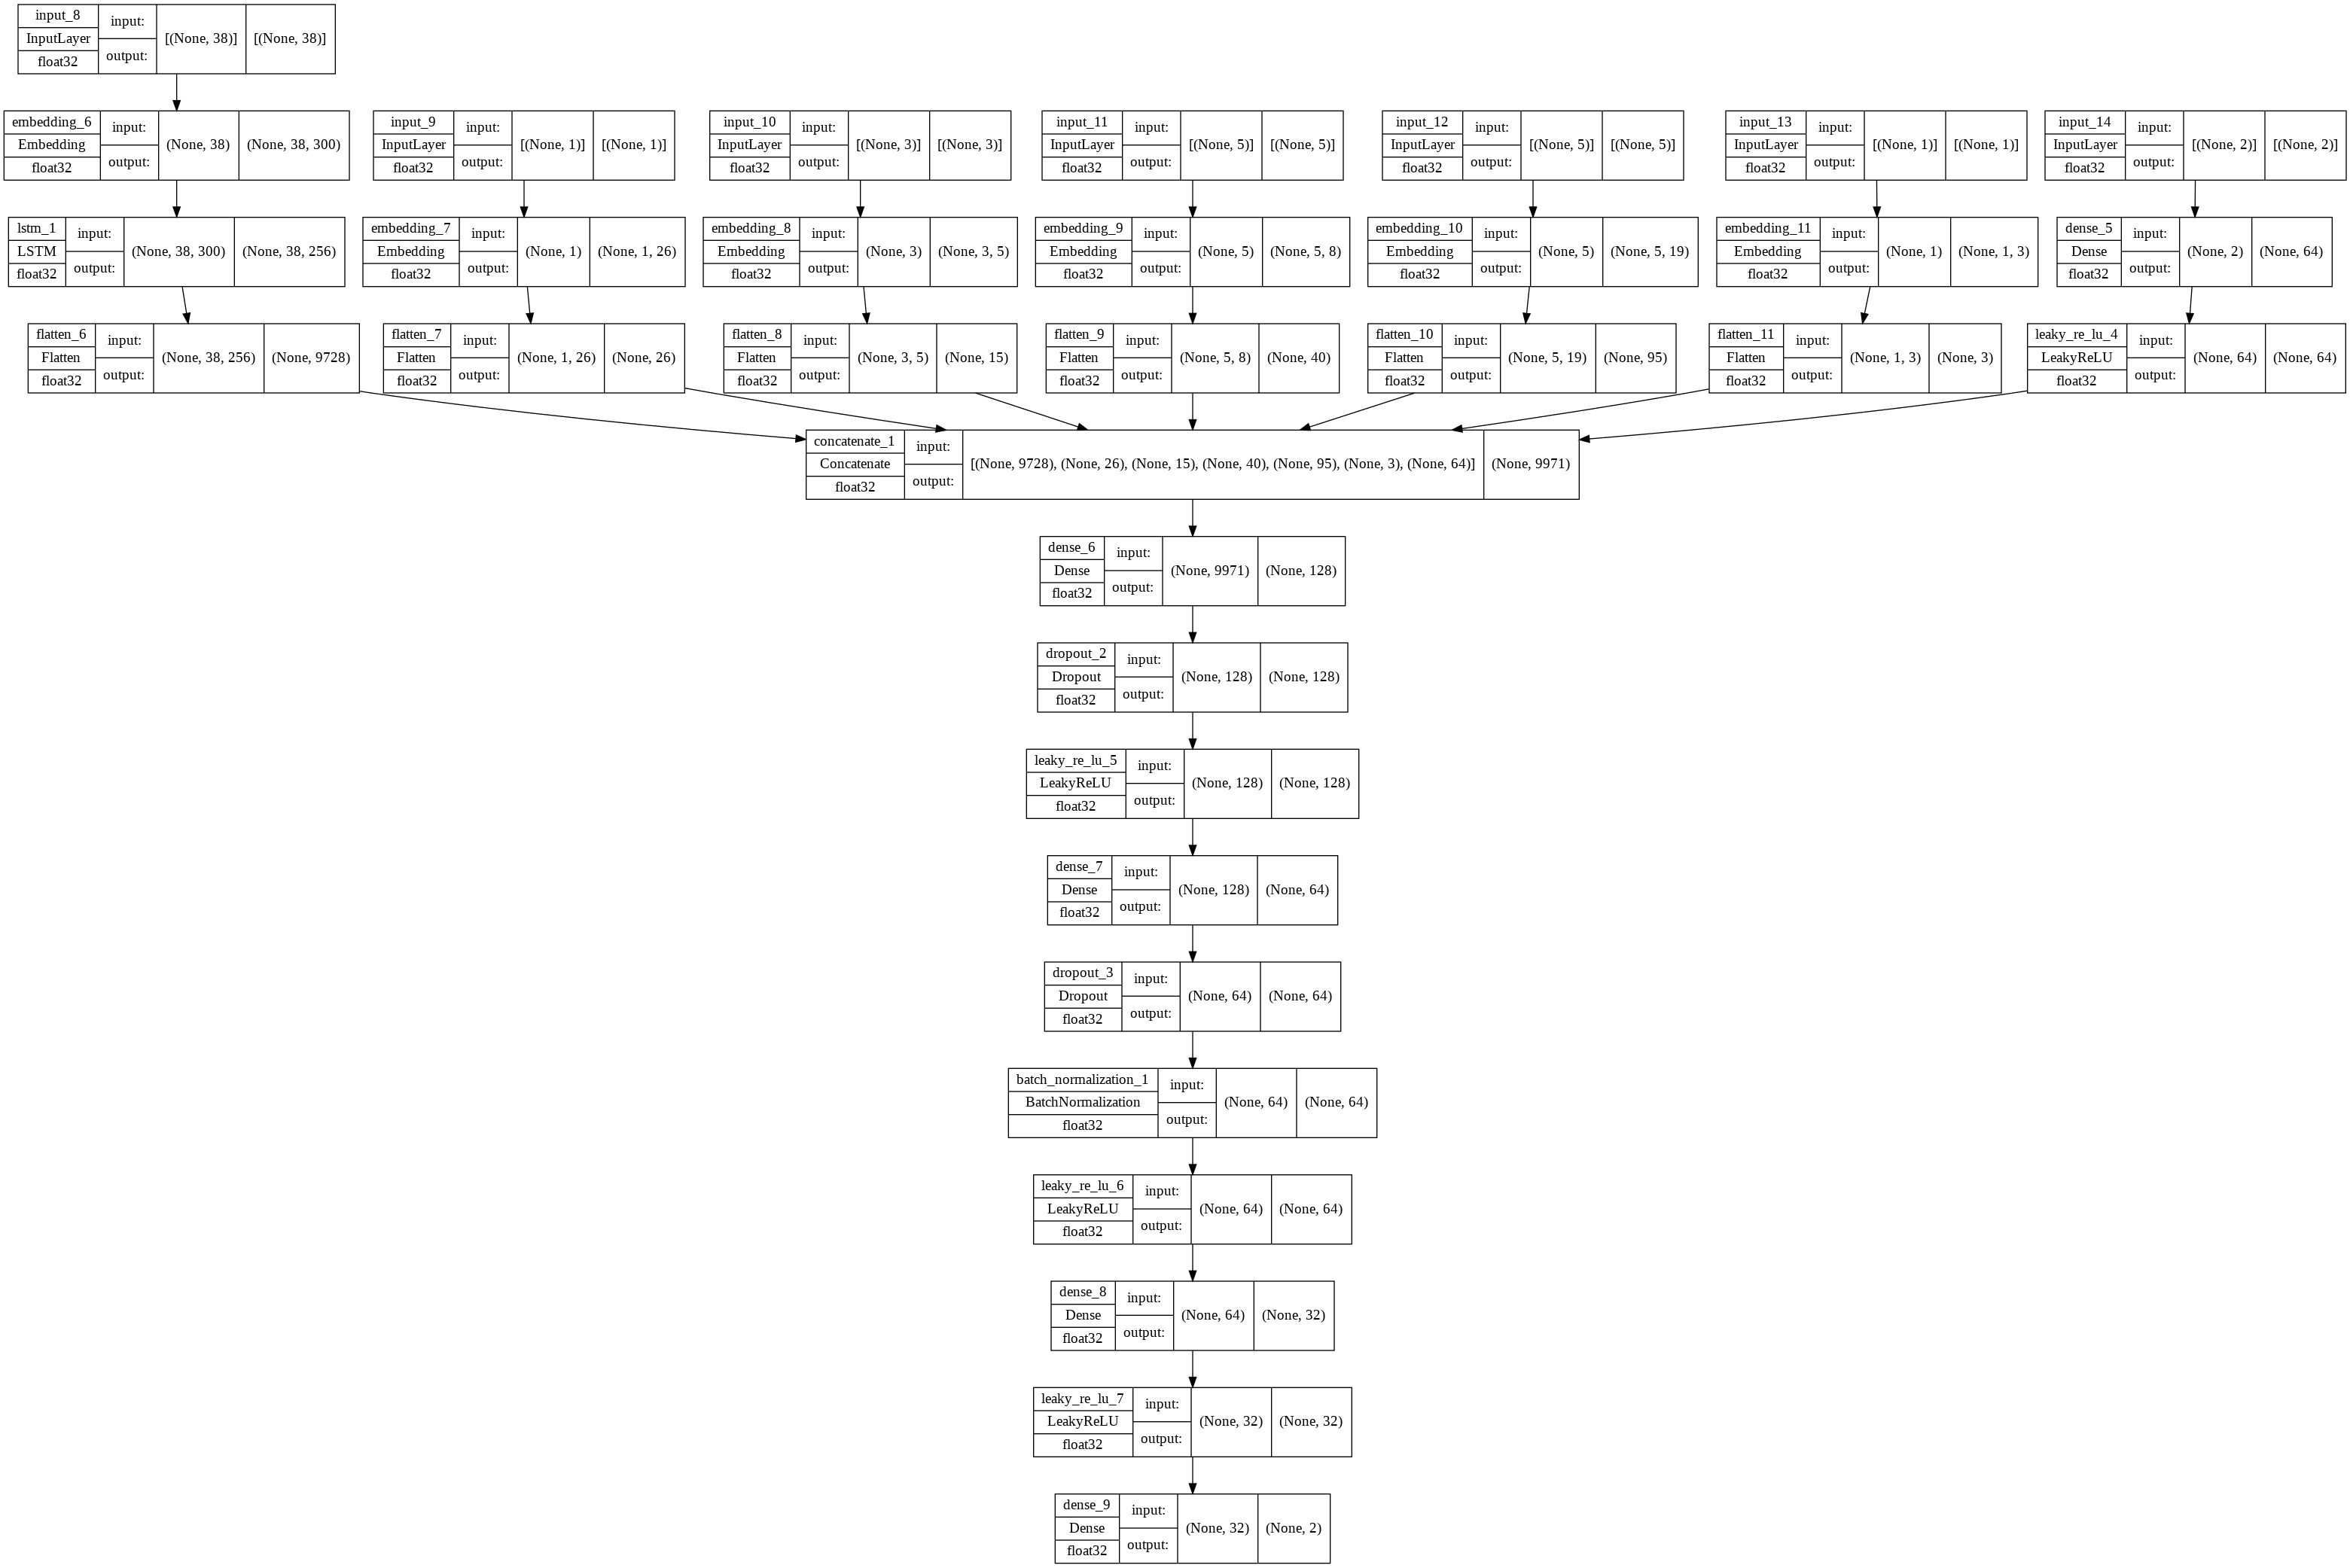

In [75]:
plot_model(model2,to_file='/content/drive/MyDrive/Kaggle/LSTM2.png',show_shapes=True, show_dtype=True, show_layer_names=True)

In [76]:
from sklearn.metrics import roc_auc_score
from keras.callbacks import Callback
class RocCallback(Callback):
    def __init__(self,training_data,validation_data):
        self.x = training_data[0]
        self.y = training_data[1]
        self.x_val = validation_data[0]
        self.y_val = validation_data[1]


    def on_train_begin(self, logs={}):
        self.history={'loss': [],'accuracy': [],'val_loss': [],'val_accuracy': [],'val_AUC': []}
        return

    def on_epoch_end(self, epoch, logs={}):
        y_pred_train = self.model.predict(self.x)
        roc_train = roc_auc_score(self.y, y_pred_train)
        y_pred_val = self.model.predict(self.x_val)
        roc_val = roc_auc_score(self.y_val, y_pred_val)
        self.history['val_AUC'].append(roc_val)
        print('\rroc-auc_train: %s - roc-auc_val: %s' % (str(round(roc_train,4)),str(round(roc_val,4))),end=100*' '+'\n')
        return

roc = RocCallback(training_data=([pad_essay_tr,pad_ss_tr,pad_pgc_tr,pad_cc_tr,pad_cs_tr,pad_tp_tr,num_features_tr],y_tr),
                  validation_data=([pad_essay_te,pad_ss_te,pad_pgc_te,pad_cc_te,pad_cs_te,pad_tp_te,num_features_te],y_te))
tensorboard=tensorflow.keras.callbacks.TensorBoard(log_dir='logs/model2',write_images=True) 
earlystopping = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, verbose=1)  
filepath=filepath="model2_save/weights-{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpoint = tensorflow.keras.callbacks.ModelCheckpoint(filepath, monitor='val_AUC', verbose=1, save_best_only=True, mode='max')

In [77]:
!rm -rf logs

In [78]:
model2.compile(loss='categorical_crossentropy', optimizer=tensorflow.keras.optimizers.Adam(0.0006),metrics=['accuracy'])

In [79]:
model2.fit([pad_essay_tr,pad_ss_tr,pad_pgc_tr,pad_cc_tr,pad_cs_tr,pad_tp_tr,num_features_tr],y_tr,
           epochs=10,steps_per_epoch=pad_essay_tr.shape[0]//256,
           batch_size=256,callbacks=[tensorboard,checkpoint,roc],
           validation_data=([pad_essay_te,pad_ss_te,pad_pgc_te,pad_cc_te,pad_cs_te,pad_tp_te,num_features_te],y_te))

Epoch 1/10
319/320 [============================>.] - ETA: 0s - loss: 0.6646 - accuracy: 0.8263WARNING:tensorflow:Can save best model only with val_AUC available, skipping.
roc-auc_train: 0.6179 - roc-auc_val: 0.5973                                                                                                    
320/320 [==============================] - 19s 52ms/step - loss: 0.6645 - accuracy: 0.8263 - val_loss: 0.5875 - val_accuracy: 0.8486
Epoch 2/10
317/320 [============================>.] - ETA: 0s - loss: 0.5579 - accuracy: 0.8473WARNING:tensorflow:Can save best model only with val_AUC available, skipping.
roc-auc_train: 0.609 - roc-auc_val: 0.5918                                                                                                    
320/320 [==============================] - 17s 52ms/step - loss: 0.5574 - accuracy: 0.8475 - val_loss: 0.5395 - val_accuracy: 0.8486
Epoch 3/10
320/320 [==============================] - ETA: 0s - loss: 0.5237 - accuracy: 0.8484WARNIN

In [80]:
model2.save_weights('/content/drive/MyDrive/Kaggle/LSTMmodel2.h5')

# <font color='red'> Model-3 </font>

<img src='https://i.imgur.com/fkQ8nGo.png'>
ref: https://i.imgur.com/fkQ8nGo.png

In [ ]:
#in this model you can use the text vectorized data from model1 
#for other than text data consider the following steps
# you have to perform one hot encoding of categorical features. You can use onehotencoder() or countvectorizer() for the same.
# Stack up standardised numerical features and all the one hot encoded categorical features
#the input to conv1d layer is 3d, you can convert your 2d data to 3d using np.newaxis
# Note - deep learning models won't work with sparse features, you have to convert them to dense features before fitting in the model.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
bow=CountVectorizer()

In [ ]:
x_tr,x_te,y_tr,y_te=train_test_split(x,y,test_size=0.25,stratify=y,random_state=1)

In [ ]:
token=Tokenizer()
token.fit_on_texts(x['essay'])
essay_token_tr=token.texts_to_sequences(x_tr['essay'])
essay_token_te=token.texts_to_sequences(x_te['essay'])
vocab_size_essay=len(token.word_index)+1
word_index_essay=token.word_index
print(vocab_size_essay)
print(len(essay_token_tr),len(essay_token_te))

56382
81936 27312


In [ ]:
count1=max([len(i) for i in essay_token_tr])
count2=max([len(i) for i in essay_token_te])
essay_maxlen=max(count1,count2)
pad_essay_tr=padding(essay_token_tr,essay_maxlen)
pad_essay_te=padding(essay_token_te,essay_maxlen)
print(pad_essay_tr.shape,pad_essay_te.shape)

(81936, 339) (27312, 339)


In [ ]:
bow.fit(x_tr['clean_categories'])
ohe_cc_tr=bow.transform(x_tr['clean_categories'])
ohe_cc_te=bow.transform(x_te['clean_categories'])
print(ohe_cc_tr.shape,ohe_cc_te.shape)

(81936, 9) (27312, 9)


In [ ]:
bow.fit(x_tr['clean_subcategories'])
ohe_cs_tr=bow.transform(x_tr['clean_subcategories'])
ohe_cs_te=bow.transform(x_te['clean_subcategories'])
print(ohe_cs_tr.shape,ohe_cs_te.shape)

(81936, 30) (27312, 30)


In [ ]:
bow.fit(x_tr['school_state'])
ohe_ss_tr=bow.transform(x_tr['school_state'])
ohe_ss_te=bow.transform(x_te['school_state'])
print(ohe_ss_tr.shape,ohe_ss_te.shape)

(81936, 51) (27312, 51)


In [ ]:
bow.fit(x_tr['project_grade_category'])
ohe_pgc_tr=bow.transform(x_tr['project_grade_category'])
ohe_pgc_te=bow.transform(x_te['project_grade_category'])
print(ohe_pgc_tr.shape,ohe_pgc_te.shape)

(81936, 4) (27312, 4)


In [ ]:
bow.fit(x_tr['teacher_prefix'])
ohe_tp_tr=bow.transform(x_tr['teacher_prefix'])
ohe_tp_te=bow.transform(x_te['teacher_prefix'])
print(ohe_tp_tr.shape,ohe_tp_te.shape)

(81936, 5) (27312, 5)


In [ ]:
from scipy.sparse import hstack

In [ ]:
scaler.fit(x_tr['price'].values.reshape(-1,1))
scaled_price_tr=scaler.transform(x_tr['price'].values.reshape(-1,1))
scaled_price_te=scaler.transform(x_te['price'].values.reshape(-1,1))
scaler.fit(x_tr['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
scaled_tnppp_tr=scaler.transform(x_tr['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
scaled_tnppp_te=scaler.transform(x_te['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

In [ ]:
stacked_tr=hstack((ohe_cc_tr,ohe_cs_tr,ohe_ss_tr,ohe_pgc_tr,ohe_tp_tr,scaled_price_tr,scaled_tnppp_tr)).toarray()
stacked_te=hstack((ohe_cc_te,ohe_cs_te,ohe_ss_te,ohe_pgc_te,ohe_tp_te,scaled_price_te,scaled_tnppp_te)).toarray()
print(stacked_tr.shape,stacked_te.shape)

(81936, 101) (27312, 101)


In [ ]:
stacked_tr=stacked_tr[:,:,np.newaxis]
stacked_te=stacked_te[:,:,np.newaxis]
print(stacked_tr.shape,stacked_te.shape)

(81936, 101, 1) (27312, 101, 1)


In [ ]:
input1=Input(shape=essay_maxlen)
embed=Embedding(input_dim=vocab_size_essay,output_dim=300,input_length=essay_maxlen,embeddings_initializer=tensorflow.keras.initializers.constant(emb_matrix_essay),trainable=False)(input1)
lstm=LSTM(256,return_sequences=True)(embed)
flat1=Flatten()(lstm)

input2=Input(shape=(stacked_tr.shape[1],stacked_tr.shape[2]))
conv1=Conv1D(filters=32,kernel_size=3)(input2)
act1=LeakyReLU()(conv1)
conv2=Conv1D(filters=64,kernel_size=5)(act1)
act2=LeakyReLU()(conv2)
flat2=Flatten()(act2)

concat=Concatenate(axis=-1)([flat1,flat2])
x=Dense(128)(concat)
x=LeakyReLU()(x)
x=Dropout(0.5)(x)
x=Dense(32)(x)
x=LeakyReLU()(x)
x=Dropout(0.5)(x)
x=BatchNormalization()(x)
x=Dense(16)(x)
x=LeakyReLU()(x)
x=Dropout(0.5)(x)
output=Dense(n_classes,activation='softmax')(x)
model3=tensorflow.keras.Model(inputs=[input1,input2],outputs=output)
model3.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_22 (InputLayer)          [(None, 101, 1)]     0           []                               
                                                                                                  
 conv1d_3 (Conv1D)              (None, 99, 32)       128         ['input_22[0][0]']               
                                                                                                  
 input_21 (InputLayer)          [(None, 339)]        0           []                               
                                                                                                  
 leaky_re_lu_2 (LeakyReLU)      (None, 99, 32)       0           ['conv1d_3[0][0]']               
                                                                                            

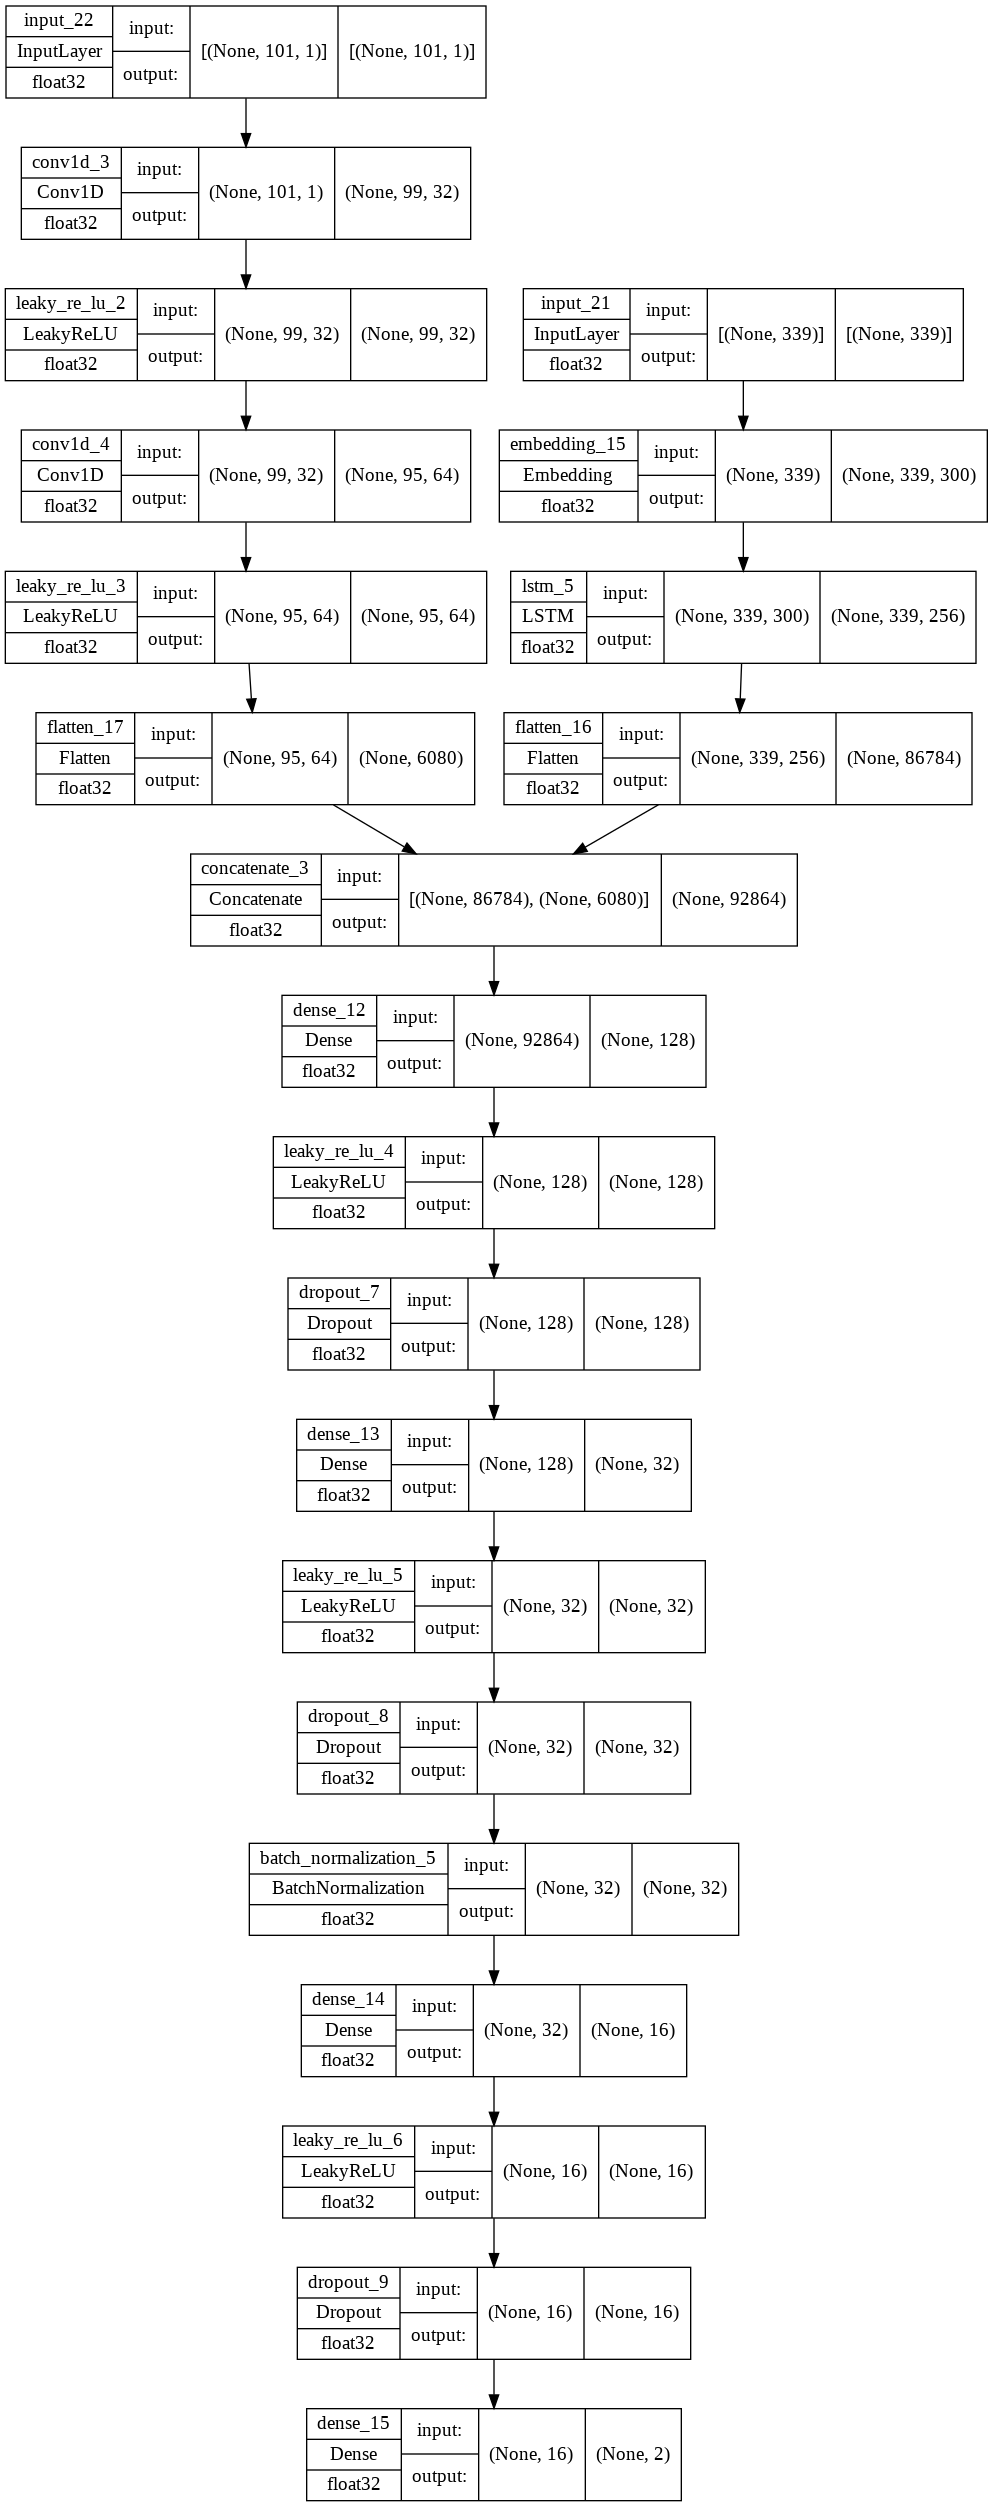

In [ ]:
plot_model(model3,to_file='/content/drive/MyDrive/Kaggle/LSTM3.png',show_shapes=True, show_dtype=True, show_layer_names=True)

In [ ]:
from sklearn.metrics import roc_auc_score
from keras.callbacks import Callback
class RocCallback(Callback):
    def __init__(self,training_data,validation_data):
        self.x = training_data[0]
        self.y = training_data[1]
        self.x_val = validation_data[0]
        self.y_val = validation_data[1]


    def on_train_begin(self, logs={}):
        self.history={'loss': [],'accuracy': [],'val_loss': [],'val_accuracy': [],'val_AUC': []}
        return

    def on_epoch_end(self, epoch, logs={}):
        y_pred_train = self.model.predict(self.x)
        roc_train = roc_auc_score(self.y, y_pred_train)
        y_pred_val = self.model.predict(self.x_val)
        roc_val = roc_auc_score(self.y_val, y_pred_val)
        self.history['val_AUC'].append(roc_val)
        print('\rroc-auc_train: %s - roc-auc_val: %s' % (str(round(roc_train,4)),str(round(roc_val,4))),end=100*' '+'\n')
        return

roc = RocCallback(training_data=([pad_essay_tr,stacked_tr],y_tr),
                  validation_data=([pad_essay_te,stacked_te],y_te))
tensorboard=tensorflow.keras.callbacks.TensorBoard(log_dir='logs/model3',write_images=True) 
earlystopping = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, verbose=1)  
filepath=filepath="model3_save/weights-{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpoint = tensorflow.keras.callbacks.ModelCheckpoint(filepath, monitor='val_AUC', verbose=1, save_best_only=True, mode='max')

In [ ]:
model3.compile(loss='categorical_crossentropy', optimizer=tensorflow.keras.optimizers.Adam(0.0006),metrics=['accuracy'])

In [ ]:
model3.fit([pad_essay_tr,stacked_tr],y_tr,
           epochs=10,steps_per_epoch=pad_essay_tr.shape[0]//256,
           batch_size=256,callbacks=[tensorboard,checkpoint,roc],
           validation_data=([pad_essay_te,stacked_te],y_te))

Epoch 1/10
320/320 [==============================] - ETA: 0s - loss: 0.6278 - accuracy: 0.7132WARNING:tensorflow:Can save best model only with val_AUC available, skipping.
roc-auc_train: 0.6965 - roc-auc_val: 0.6928                                                                                                    
320/320 [==============================] - 103s 291ms/step - loss: 0.6278 - accuracy: 0.7132 - val_loss: 0.4125 - val_accuracy: 0.8486
Epoch 2/10
320/320 [==============================] - ETA: 0s - loss: 0.5003 - accuracy: 0.8150WARNING:tensorflow:Can save best model only with val_AUC available, skipping.
roc-auc_train: 0.5499 - roc-auc_val: 0.5514                                                                                                    
320/320 [==============================] - 79s 246ms/step - loss: 0.5003 - accuracy: 0.8150 - val_loss: 0.4368 - val_accuracy: 0.8486
Epoch 3/10
320/320 [==============================] - ETA: 0s - loss: 0.4566 - accuracy: 0.8436WA

In [ ]:
model3.save_weights('/content/drive/MyDrive/Kaggle/LSTMModel3.h5')